# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Finding** 
***
The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import math
import os
%matplotlib inline

# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

outputDir = 'output_images'

## Camera Calibration (computing camera matrix and distortion coefficients)
1. Convert all color images of chess board in the folder 'camera_cal' to gray scale images.
2. Use `cv2.findChessboardCorners()` to find the 9x6 corner grid`. Only 17 / 20 of images can be used as 3 of them do not all 9x6 corner grid.
3. Use `cv2.cornerSubPix()` to increase the accuracy of the corner positions and store all the 2D points in image plane to `imgpoints[]'.
4. Use `numpy.mgrid()` to create 3D point in real world space to `objpoints[]`.
5. Pass all the points to `cv2.calibrateCamera()` to compute the camera matrix and the distortion coefficients.
6. We can pass the camera matrix and the distortion coefficients to `cv2.undistort()` to undistot the image.

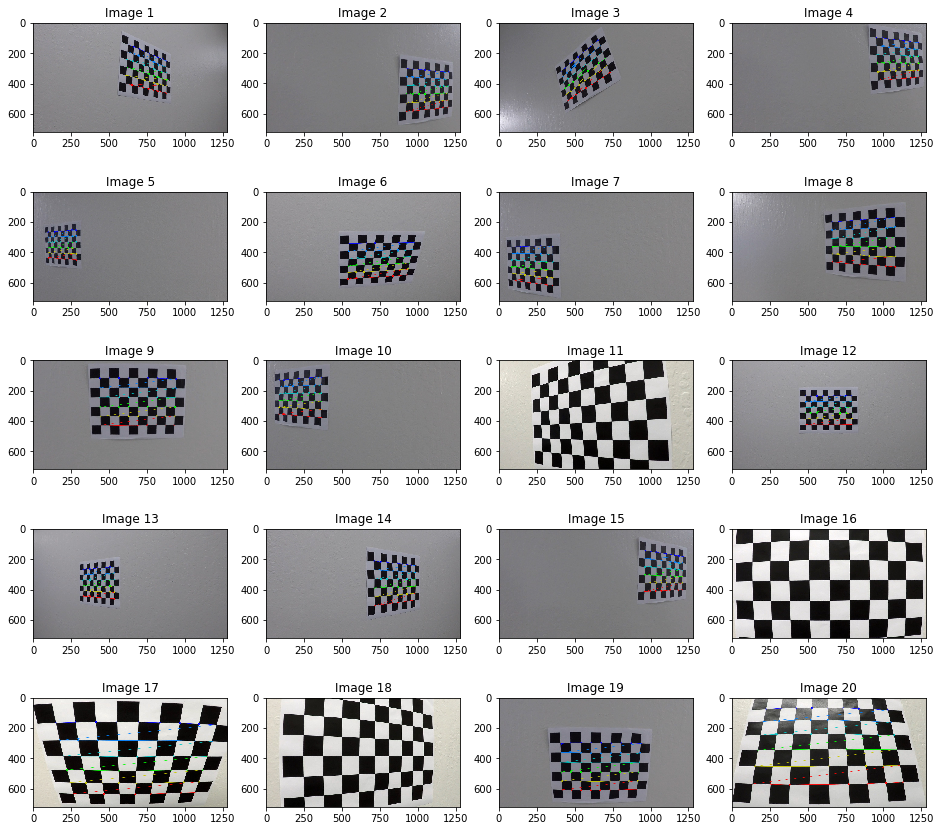

17/20 Chessboard Found
Camera Calibration Matrix:
[[  1.15694047e+03   0.00000000e+00   6.65948815e+02]
 [  0.00000000e+00   1.15213880e+03   3.88784787e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
Camera Distortion:
[[ -2.37638054e-01  -8.54042210e-02  -7.90999420e-04  -1.15882399e-04
    1.05726095e-01]]


In [2]:
chessboardFoundCount = 0
chessboardCount = 0
chessboardColCount = 9
chessboardRowCount = 6
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objPts = np.zeros((chessboardColCount * chessboardRowCount, 3), np.float32)
objPts[:,:2] = np.mgrid[0:chessboardColCount, 0:chessboardRowCount].T.reshape(-1,2)
objPoints = []
imgPoints = []

inputDir = 'camera_cal'
imageList = os.listdir(inputDir)

pltColCount = 4
loopPerRow = 4
fig = plt.figure(figsize=(16, 12 * len(imageList) / loopPerRow / pltColCount))
for fileName in imageList:
    image = mpimg.imread(os.path.join(inputDir, fileName))
    grayImage = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(grayImage, (chessboardColCount, chessboardRowCount), None)
    
    # Save image for report
    mpimg.imsave(os.path.join(outputDir, fileName), image, format='jpg')
    mpimg.imsave(os.path.join(outputDir, 'gray_' + fileName), grayImage, format='jpg', cmap='gray')
        
    if ret:
            
        cv2.drawChessboardCorners(image, (chessboardColCount, chessboardRowCount), corners, ret)
        
        corners2 = cv2.cornerSubPix(grayImage, corners, (11, 11), (-1, -1), criteria)
        
        objPoints.append(objPts)
        imgPoints.append(corners2)
        chessboardFoundCount = chessboardFoundCount + 1
        
        # Save image for report
        mpimg.imsave(os.path.join(outputDir, 'drawCorner_'+ fileName), image, format='jpg')
    temp = 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, chessboardCount * pltColCount // loopPerRow + temp)
    plt.imshow(image)
    plt.title('Image {}'.format(chessboardCount + 1))
    chessboardCount = chessboardCount + 1
    
plt.show()

print('{}/{} Chessboard Found'.format(chessboardFoundCount, chessboardCount))

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints, grayImage.shape[::-1], None, None)

print('Camera Calibration Matrix:')
print(mtx)
print('Camera Distortion:')
print(dist)

### Distortion-corrected image of the calibration images.
---

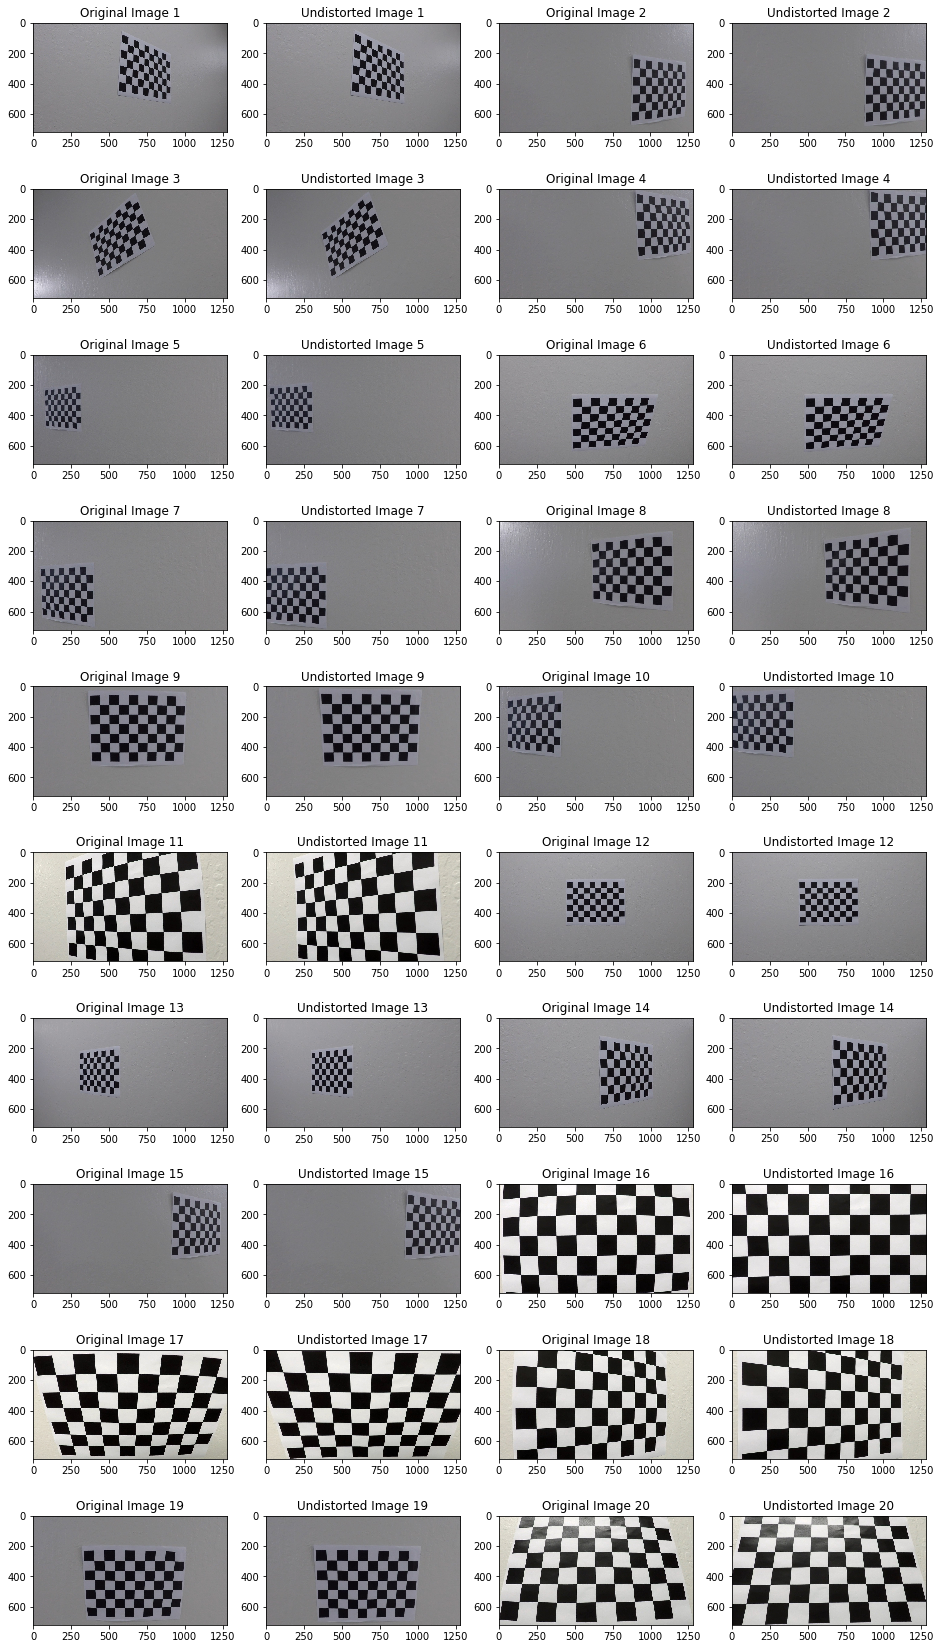

In [3]:
inputDir = 'camera_cal'
imageList = os.listdir(inputDir)
index = 0
pltColCount = 4
loopPerRow = 2
fig = plt.figure(figsize=(16, 12 * len(imageList) / loopPerRow / pltColCount))
for fileName in imageList:
    image = mpimg.imread(os.path.join(inputDir, fileName))
    undistorted = cv2.undistort(image, mtx, dist, None, mtx)
        
    # Save image for report
    mpimg.imsave(os.path.join(outputDir, fileName), undistorted, format='jpg')
    mpimg.imsave(os.path.join(outputDir, 'undistorted_'+ fileName), undistorted, format='jpg')
    
    temp = 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(image)
    plt.title('Original Image {}'.format(index + 1))
    temp = temp + 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(undistorted)
    plt.title('Undistorted Image {}'.format(index + 1))
        
        
    index = index + 1
plt.show()

### Distortion-corrected image of the test images.
---

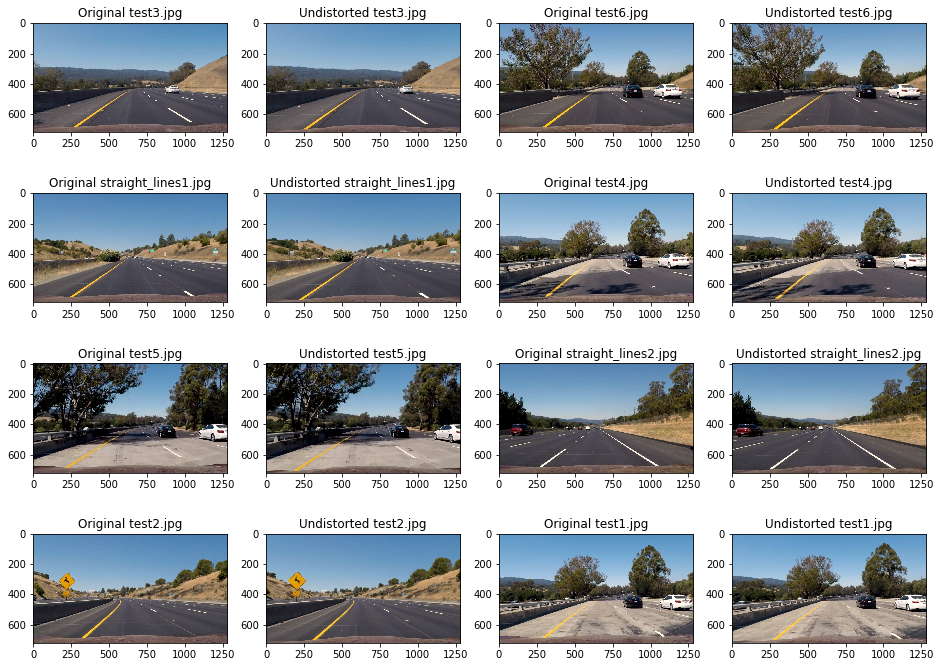

In [4]:
inputDir = 'test_images'
imageList = os.listdir(inputDir)
index = 0
pltColCount = 4
loopPerRow = 2
fig = plt.figure(figsize=(16, 12 * len(imageList) / loopPerRow / pltColCount))
for fileName in imageList:
    image = mpimg.imread(os.path.join(inputDir, fileName))
    undistorted = cv2.undistort(image, mtx, dist, None, mtx)
        
    # Save image for report
    mpimg.imsave(os.path.join(outputDir, fileName), undistorted, format='jpg')
    mpimg.imsave(os.path.join(outputDir, 'undistorted_'+ fileName), undistorted, format='jpg')
    
    temp = 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(image)
    plt.title('Original {}'.format(fileName))
    temp = temp + 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(undistorted)
    plt.title('Undistorted {}'.format(fileName))
        
        
    index = index + 1
plt.show()

### Thresholding to create binary image using color transforms and gradients.
---

1. Compute the image to HSV Image.
2. Compute the image to HLS Image.
3. From HSV image, select pixels when the corresonding hue is between 40&deg; - 80&deg;, saturation is over 24% and valu is over 16%. It is trying to extract yellow line.
4. From HLS image, select pixels when the corresonding light channel is over 78%. It is trying to extract white line.
5. From HLS image, compute the x gradient using sobel mark on the light channel. Select pixels when the gradient is over 31% or its maximum. It is trying to extract lines for different colors.
6. In the following color binary images, different colors show the lines extracted from different methods. Red represents  the white lines, Green represents the lines from gradient. Blue represents the yellow lines.

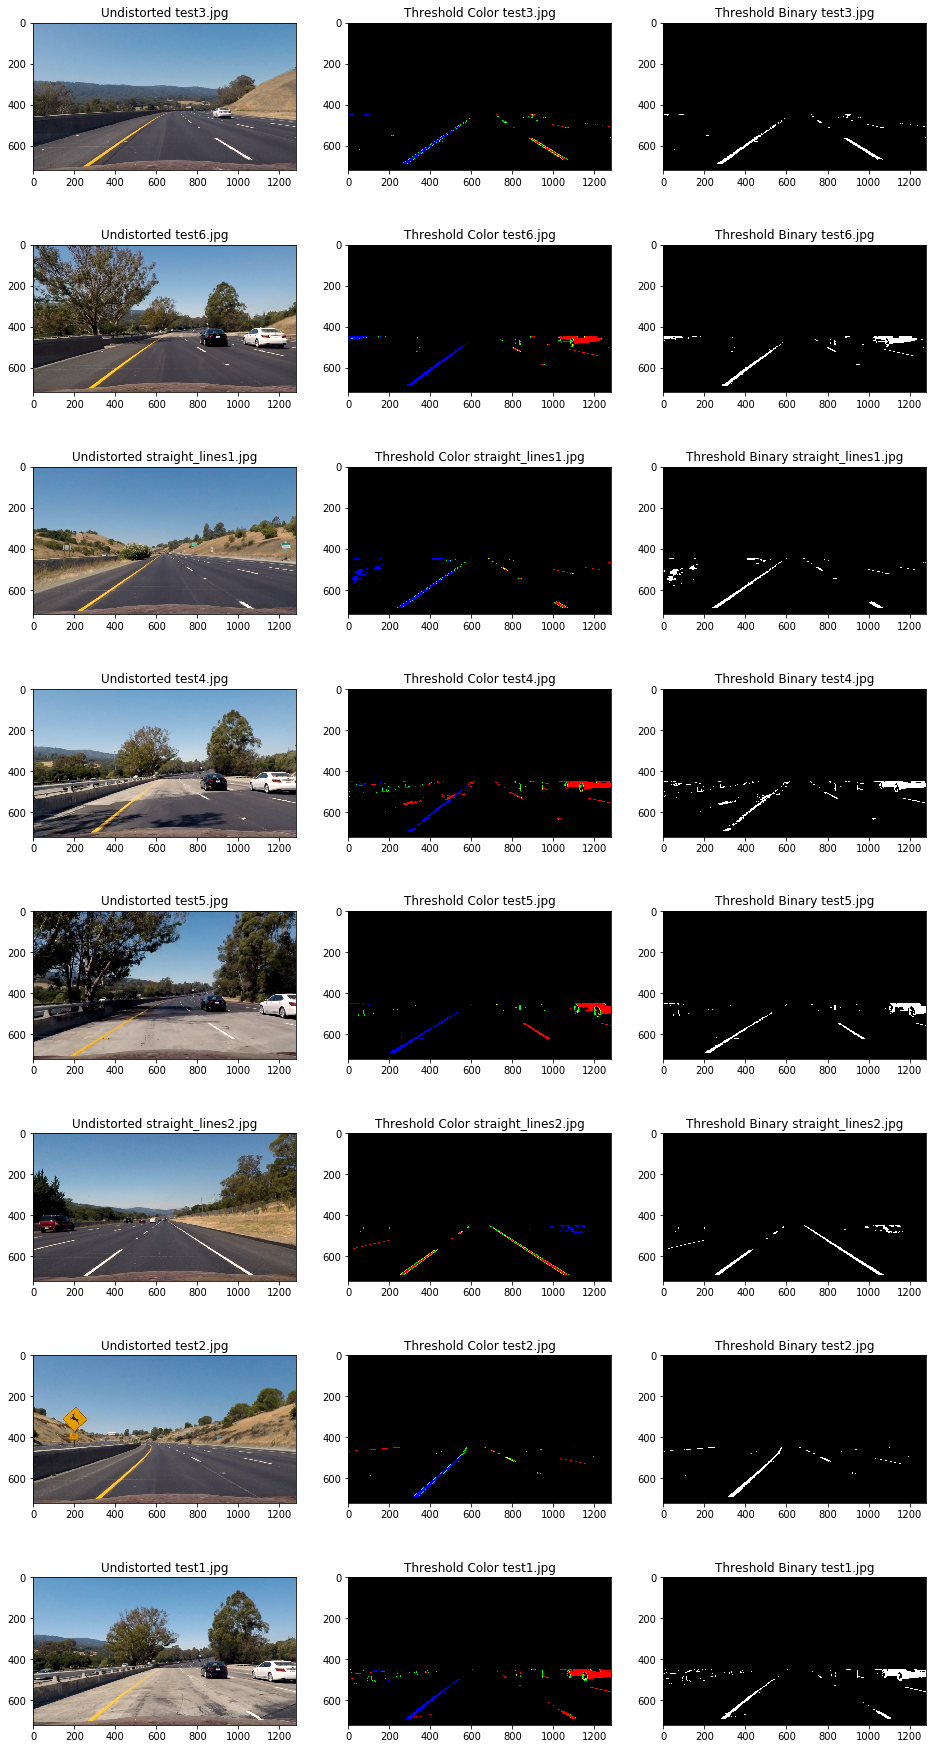

In [5]:
def detectRoad(image):
    image = np.copy(image)
    
    image[:450,:] = [0, 0, 0]
    image[690:,:] = [0, 0, 0]
    hsvImage = cv2.cvtColor(image, cv2.COLOR_RGB2HSV) #20 / 360 - 80 / 360 = 10 - 40
    hlsImage = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    
    # Detect White
    whiteBinary = np.zeros_like(hlsImage[:,:,1])
    whiteLower = np.array([200])
    whiteUpper = np.array([255])
    whiteBinary[cv2.inRange(hlsImage[:,:,1], whiteLower, whiteUpper) == 255] = 1
    
    # Detect Gradient
    gradX = cv2.Sobel(hlsImage[:,:,1], cv2.CV_64F, 1, 0, ksize=7)
    absGradX = np.absolute(gradX)
    scaledGradX = np.uint8(absGradX / np.max(absGradX) * 255)    
    gradBinary = np.zeros_like(hlsImage[:,:,1])
    gradLower = np.array([80])
    gradUpper = np.array([255])
    gradBinary[cv2.inRange(scaledGradX, gradLower, gradUpper) == 255] = 1
    
    # Detect Yellow
    yellowBinary = np.zeros_like(hsvImage[:,:,0])
    yellowLower = np.array([ 20,  60,  40])
    yellowUpper = np.array([ 40, 255, 255])
    yellowBinary[cv2.inRange(hsvImage, yellowLower, yellowUpper) == 255] = 1, 
    
    singleBinary = np.zeros_like(hlsImage[:,:,1])
    singleBinary[((whiteBinary == 1) | (gradBinary == 1) | (yellowBinary == 1))] = 1
    
    colorBinary = np.dstack((whiteBinary, gradBinary, yellowBinary)) * 255
    binary = np.dstack((singleBinary, singleBinary, singleBinary)) * 255
    
    return [colorBinary, binary]

inputDir = 'test_images'
imageList = os.listdir(inputDir)
index = 0
pltColCount = 3
loopPerRow = 1
fig = plt.figure(figsize=(16, 12 * len(imageList) / loopPerRow / pltColCount))
for fileName in imageList:
    image = mpimg.imread(os.path.join(inputDir, fileName))
    
    undistorted = cv2.undistort(image, mtx, dist, None, mtx)
    [colorBinary, binary] = detectRoad(undistorted)
    
    mpimg.imsave(os.path.join(outputDir, fileName), image, format='jpg')
    mpimg.imsave(os.path.join(outputDir, 'undistorted_' + fileName), undistorted, format='jpg')
    mpimg.imsave(os.path.join(outputDir, 'colorBinary_' + fileName), colorBinary, format='jpg')
    
    temp = 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(undistorted)
    plt.title('Undistorted {}'.format(fileName))
    temp = temp + 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(colorBinary)
    plt.title('Threshold Color {}'.format(fileName))
    temp = temp + 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(binary, cmap='gray')
    plt.title('Threshold Binary {}'.format(fileName))
    index = index + 1

plt.show()

### Computing perspective transformation to create bird view
---
1. Select straight_lines1.jpg and straight_line2.jpg from the folder 'test_images'.
2. Use the above thresholding to extract the left line and the right line from the road.
3. Apply a trangle mask to the binary images so that it only contains the pixels for the lines.
4. Use `numpy.polyfit()` with order 1 to get the linear left line and the right linear right line.
5. Compute the x coordinates when both lines cut at y = 719 (Image Bottom) and y = 460.

straight_lines1.jpg
	Left Line:(209.47,719.00), (583.08,460.00)
	Right Line :(1102.59,719.00), (700.26,460.00)
	Bottom Center:656.03
	Top Center:641.67
	Bottom Length:893.12
	Top Length:117.17
straight_lines2.jpg
	Left Line:(219.51,719.00), (579.46,460.00)
	Right Line :(1105.95,719.00), (704.06,460.00)
	Bottom Center:662.73
	Top Center:641.76
	Bottom Length:886.44
	Top Length:124.60

Average Bottom Length:889.78
Average Top Length:120.88

Birdview Transform From
[[  579.55780029   460.        ]
 [  700.44219971   460.        ]
 [  195.11116028   720.        ]
 [ 1084.88879395   720.        ]]
To
[[ 320.    0.]
 [ 960.    0.]
 [ 320.  720.]
 [ 960.  720.]]


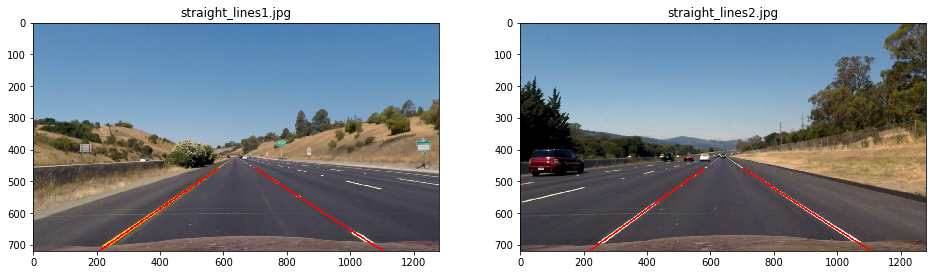

In [6]:
def findLane(image):
    [temp, binary] = detectRoad(image)
    binary = binary[:,:,0]

    mask = np.zeros_like(binary)
    ignore_mask_color = 255
    vertices = np.array([[
        (0, 670),
        (image.shape[1] / 2, 420), 
        (image.shape[1], 670)]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    maskedImage = cv2.bitwise_and(binary, mask)
    nonZero = maskedImage.nonzero()
    nonZeroY = np.array(nonZero[0])
    nonZeroX = np.array(nonZero[1])
    
    leftBound = (0 <= nonZeroX) & (nonZeroX < image.shape[1] / 2) & (0 <= nonZeroY) & (nonZeroY < image.shape[0])
    goodLeftIndices = leftBound.nonzero()[0]
    leftX = nonZeroX[goodLeftIndices]
    leftY = nonZeroY[goodLeftIndices]
    
    rightBound = (image.shape[1] / 2 <= nonZeroX) & (nonZeroX < image.shape[1]) & (0 <= nonZeroY) & (nonZeroY < image.shape[0])
    goodRightIndices = rightBound.nonzero()[0]
    rightX = nonZeroX[goodRightIndices]
    rightY = nonZeroY[goodRightIndices]
    
    leftLine = np.polyfit(leftY, leftX, 1)
    rightLine = np.polyfit(rightY, rightX, 1)

    return leftLine, rightLine

imageList = os.listdir(inputDir)
topCenterX = 0
bottomCenterX = 0
topWidth = 0
bottomWidth = 0
topLineY = 460

index = 0
pltColCount = 2
loopPerRow = 2
fig = plt.figure(figsize=(16, 12 * len(imageList) / loopPerRow / pltColCount))
for fileName in imageList:
    if not 'straight' in fileName: 
        continue
    image = mpimg.imread(os.path.join(inputDir, fileName))
    
    imageSize = (image.shape[1], image.shape[0])
    
    print(fileName)
    
    undistorted = cv2.undistort(image, mtx, dist, None, mtx)
    leftLine, rightLine = findLane(undistorted)
    
    line1y1 = image.shape[0]-1
    line1y2 = topLineY
    line1x1 = line1y1 * leftLine[0] + leftLine[1]
    line1x2 = line1y2 * leftLine[0] + leftLine[1]
    cv2.line(undistorted, (int(line1x1), int(line1y1)), (int(line1x2), int(line1y2)), [255,   0,   0], 4)
    print('\tLeft Line:({:.2f},{:.2f}), ({:.2f},{:.2f})'.format(line1x1, line1y1, line1x2, line1y2))
    
    line2y1 = image.shape[0]-1
    line2y2 = topLineY
    line2x1 = line2y1 * rightLine[0] + rightLine[1]
    line2x2 = line2y2 * rightLine[0] + rightLine[1]
    cv2.line(undistorted, (int(line2x1), int(line2y1)), (int(line2x2), int(line2y2)), [255,   0,   0], 4)
    print('\tRight Line :({:.2f},{:.2f}), ({:.2f},{:.2f})'.format(line2x1, line2y1, line2x2, line2y2))
    
    topWidth = topWidth + line2x2 - line1x2
    bottomWidth = bottomWidth + line2x1 - line1x1
    
    print('\tBottom Center:{:.2f}'.format((line1x1 + line2x1) / 2))
    print('\tTop Center:{:.2f}'.format((line1x2 + line2x2) / 2))
          
    print('\tBottom Length:{:.2f}'.format(line2x1 - line1x1))
    print('\tTop Length:{:.2f}'.format(line2x2 - line1x2))
    
    mpimg.imsave(os.path.join(outputDir, "LinearLineFit_" + fileName), undistorted, format='jpg')
    
    temp = 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(undistorted)
    plt.title('{}'.format(fileName))
    index = index + 1

topWidth = topWidth / 2
bottomWidth = bottomWidth / 2

print('')

print('Average Bottom Length:{:.2f}'.format(bottomWidth))
print('Average Top Length:{:.2f}'.format(topWidth))

centerX = imageSize[0] / 2
marginX = imageSize[0] / 4

print('')

print('Birdview Transform From')
# Top Left -> Top Right -> Bottom Right -> Bottom Left
src = np.float32(
    [[centerX - topWidth / 2, topLineY], [centerX + topWidth / 2, topLineY],
     [centerX - bottomWidth / 2, imageSize[1]], [centerX + bottomWidth / 2, imageSize[1]]])
print(src)
print('To')
dst = np.float32(
    [[marginX, 0], [imageSize[0]-marginX, 0],
     [marginX, imageSize[1]], [imageSize[0]-marginX, imageSize[1]]])
print(dst)
birdViewTransform = cv2.getPerspectiveTransform(src, dst)
inverseBirdViewTransform = cv2.getPerspectiveTransform(dst, src)

def createBirdView(image):
    birdViewImage = cv2.warpPerspective(image, birdViewTransform, imageSize)
    return birdViewImage

def convertBirdViewBack(image):
    normalImage = cv2.warpPerspective(image, inverseBirdViewTransform, imageSize)
    return normalImage

### Apply the perspective transform to rectify the image (Bird View)
---

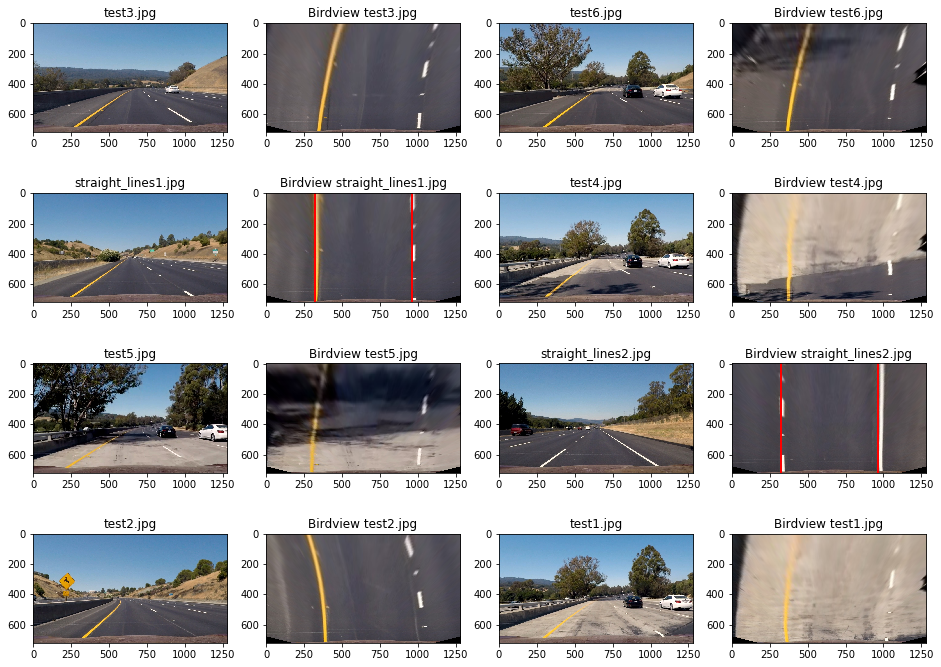

In [7]:
inputDir = 'test_images'
imageList = os.listdir(inputDir)
index = 0
pltColCount = 4
loopPerRow = 2
fig = plt.figure(figsize=(16, 12 * len(imageList) / loopPerRow / pltColCount))
for fileName in imageList:
    image = mpimg.imread(os.path.join(inputDir, fileName))
    
    undistorted = cv2.undistort(image, mtx, dist, None, mtx)
    birdViewImage = createBirdView(undistorted)
    
    mpimg.imsave(os.path.join(outputDir, fileName), image, format='jpg')
    mpimg.imsave(os.path.join(outputDir, "birdView_" + fileName), birdViewImage, format='jpg')
    
    if 'straight' in fileName:
        cv2.line(birdViewImage, (imageSize[0] // 4, 0), (imageSize[0] // 4, imageSize[1] - 1), [255,   0,   0], 10)
        cv2.line(birdViewImage, (imageSize[0] * 3 // 4, 0), (imageSize[0] * 3 // 4, imageSize[1] - 1), [255,   0,   0], 10)
        mpimg.imsave(os.path.join(outputDir, "birdViewWithParallelLine_" + fileName), birdViewImage, format='jpg')
    
    temp = 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(image)
    plt.title('{}'.format(fileName))
    temp = temp + 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(birdViewImage)
    plt.title('Birdview {}'.format(fileName))
    index = index + 1

### Identify lane-line pixels and fit their positions with a 2nd order polynomial

After the binary image in bird view is created, the lane line would be fitted to a 2nd order curve in the following way:
1. Create the histogram from the binary image. There should be two peaks in the histogram. The leftmost one represents the left line. The rightmost one represents the right line.
2. The x-coordinates of the 2 peaks can act as a start point from the bottom. Only the activated pixels within a window `newWinWidth x (Image Height / slideWinSize` would be consider as good pixel if the number of activated pixels reach a threshold `minPix`.
3. If the number of activated pixels reach a threshold `minPix`, find the mean positions of activated poixel within the window. The mean positions become the center of next window in upper positon. If the number of activated pixels do not reach a threshold `minPix`, the the center of next window in upper position would kept unchanged.
4. Only the activated pixels within a window `newWinWidth x (Image Height / slideWinSize` would be consider as good pixel if the number of activated pixels reach a threshold `minPix`.
5. Repeat Step 3 - Step 4 for `slideWinSize` until the windows reach the top of the image. If the number of activate pixels does not reach a threshold `minPix' for 2 times consecutively. The sliding window search would stop as it may come across outliner.
6. The good pixels would be fit to a 2nd order equation using `numpy.polyfit()`.
7. Then two 2nd order curve can be found. The left one represents the left one. The right one represents the right one.

### Identify lane-line pixels and fit their positions with a 2nd order polynomial in video

The pipeline of the line finding from video is described below.
1. When the current state does not contains any historical data, it make use of the pipeline of the test image which is described below.
2. When there is result from the previous frame, the sliding window search would be different the sliding window would following the line fit from the last frame with smaller window width `existWinWidth`.
3. When there are points (good pixels) from the previous frames, the points from the previous `pointKeptForLastFrameSize` frames would be included to compute the new fitted line. It make the pipeline more robust when the current frame does not contains enough good pixels to compute the new fit line. It can also make the pipeline more robuts to outliers.
4. The computed new fit line is not the resultant line, but will be added to the history of the line fit. The resultant line would be computed by average the the coefficients of the last `coefAvgSize` frames. It makes the pipeline even more robust.
5. If the resultane lines are not reasonable, all the historical data would be deleted and start from step 1 again. For example, the widths of the road at the bottom or at the top are abnormal. The left line crosses the right line in the image. All of these lines would be rejected and start from step 1 in the next frame again.

### Calculation of the radius of curvature of the lane and the position of the vehicle with respect to center
The 2nd order equation f(y) = Ay^2 + By + C have found in the last sections. However, the unit is in the unit of pixels. We need to compute the ratio of the pixel and the meter in the real world.

According to the U.S regulations, the lane width is 3.7 meters. From the calculation of the perspective transformation, we project the road width to 640 pixels. Therefore, the meter per pixel in x direction is 3.7 / 640.

According to the U.S regulations, the dash line is 3 meters long each. From the bird view image showing straight line, we observe that the length is about 107 pixels. Therefore, the meter per pixel in y direction is 3 / 107.

Transform all the points in good pixel using the ratio of the pixel and the meter and then fit a new curve f(y) = Ay^2 + By + C.

The radius of curvature would be (1 + (2Ay + B) ^ 2) ^ (3 / 2) / |2A|. 

To compute the position of the vehicle with respect to center, subtract x-coordinates the center of the image from the average of f(y) = Ay^2 + By + C at the bottom of the image of the left line and the right line. The final offset would be in meter if all the calculation is in meter.

The class `BirdViewSIConvertor` would handle the pixel conversion.
The class `LaneLines` would identify lines in both images and videos.

In [8]:
class BirdViewSIConvertor:
    def __init__(self, meterX=3.7, pixelX=640, meterY=3, pixelY=107):
        self.meterPerPixelX = meterX / pixelX
        self.meterPerPixelY = meterY / pixelY

birdViewSIConvertor = BirdViewSIConvertor(meterX=3.7, pixelX=640, meterY=3, pixelY=107)

In [9]:
def getFitX(fit, Y):
    return fit[0] * Y ** 2 + fit[1] * Y + fit[2]

class LaneLines():
    def __init__(self, birdViewSIConvertor = BirdViewSIConvertor(), slideWinSize=9, 
                 newWinWidth=240, existWinWidth=100, pointKeptForLastFrameSize=10, 
                 coefAvgSize=10, minPix = 200, imageSize=(1280, 720)):
        # Setting
        self.birdViewSIConvertor = birdViewSIConvertor
        self.slideWinSize = slideWinSize
        self.newWinWidth = newWinWidth
        self.existWinWidth = existWinWidth
        self.minPix = minPix
        self.pointKeptForLastFrameSize = pointKeptForLastFrameSize
        self.coefAvgSize = coefAvgSize
        self.imageSize = imageSize
        # Computed Data
        self.updateLeftFit = None
        self.updateRightFit = None
        self.updateLeftFitSI = None
        self.updateRightFitSI = None
        self.updateLeftCurveSI = 0
        self.updateRightCurveSI = 0
        self.updateLaneOffset = 0
        self.updateLeftX = None
        self.updateRightX = None
        self.updateLaneAreaPts = []
        self.sampleY = np.linspace(0, self.imageSize[1] - 1,  self.imageSize[1])
        # History Data
        self.resetLeft()
        self.resetRight()
    
    # Reset left line history
    def resetLeft(self):
        self.leftCoefHistory = []
        self.leftSICoefHistory = []
        self.leftPtsXHistory = []
        self.leftPtsYHistory = []
    
    # Reset right line history
    def resetRight(self):
        self.rightCoefHistory = []
        self.rightSICoefHistory = []
        self.rightPtsXHistory = []
        self.rightPtsYHistory = []
    
    # Compute the average coefficient of the curve
    def getAvgCoef(self, coefHistory, existCoef):
        count = 0
        temp = np.zeros(3)
        for coef in coefHistory:
            if coef.shape[0] == 3:
                temp = temp + coef
                count = count + 1
        if count == 0:
            return existCoef
        avg = temp / count
        return avg
    
    # Compute the radius curvature of the line in meters.
    def getCurve(self, fitSI):
        if fitSI == None:
            return 0
        if len(fitSI) != 3:
            return 0
        return (1 + (2 * fitSI[0] * (self.imageSize[1] - 1) * self.birdViewSIConvertor.meterPerPixelY + fitSI[1]) ** 2) ** (3.0 / 2.0) / abs(2 * fitSI[0])
    
    def getX(self, fit):
        if fit == None:
            return None
        if len(fit) != 3:
            return None
        return fit[0] * self.sampleY ** 2 + fit[1] * self.sampleY + fit[2]
    
    def getOffset(self):
        if self.updateLeftX == None:
            return 0
        if self.updateRightX == None:
            return 0
        return (self.updateRightX[-1] - self.updateLeftX[-1]) * self.birdViewSIConvertor.meterPerPixelX
    
    def processNewImage(self, birdViewImage):
        self.debugImage = birdViewImage.copy()
        nonZero = birdViewImage.nonzero()
        nonZeroY = np.array(nonZero[0])
        nonZeroX = np.array(nonZero[1])
    
        winHeight = self.imageSize[1] / self.slideWinSize
        midPt = self.imageSize[0] // 2
        
        # Find the initial window
        if len(self.leftCoefHistory) == 0 or len(self.rightCoefHistory) == 0:
            histogram = np.sum(birdViewImage[self.imageSize[1] // 2:, :, 0], axis=0)
        
        if len(self.leftCoefHistory) == 0:
            leftXCurr = np.argmax(histogram[:midPt])
        
        if len(self.rightCoefHistory) == 0:
            rightXCurr = np.argmax(histogram[midPt:]) + midPt
        
        leftContd = True
        rightContd = True
        leftLineIndices = []
        rightLineIndices = []
        leftFailCount = 0
        rightFailCount = 0
        bottomY = self.imageSize[1] - 1
        for winIndex in range(self.slideWinSize):
            leftWinWidth = self.newWinWidth
            rightWinWidth = self.newWinWidth
            
            winYTop = bottomY - winHeight
            winYBottom = bottomY
            
            if leftContd:
                # Using history data to compute the window
                if len(self.leftCoefHistory) > 0:
                    leftXCurr = getFitX(self.updateLeftFit, bottomY - winHeight / 2)
                    leftWinWidth = self.existWinWidth
                
                winLeftXLeft = leftXCurr - leftWinWidth / 2
                winLeftXRight = leftXCurr + leftWinWidth / 2
                
                cv2.rectangle(self.debugImage, (int(winLeftXLeft), int(winYTop)), (int(winLeftXRight), int(winYBottom)), (0, 255, 0), 5)
                leftBound = (winLeftXLeft <= nonZeroX) & (nonZeroX < winLeftXRight) & (winYTop <= nonZeroY) & (nonZeroY < winYBottom)
                
                goodLeftIndices = leftBound.nonzero()[0]
                leftLineIndices.append(goodLeftIndices)
                
                if len(goodLeftIndices) > self.minPix:
                    leftFailCount = 0
                    leftXCurr = np.int(np.mean(nonZeroX[goodLeftIndices]))
                if (leftFailCount >= 2 and len(self.leftCoefHistory) == 0):
                    leftContd = False
                
            if rightContd:
                # Using history data to compute the window
                if len(self.rightCoefHistory) > 0:
                    rightXCurr = getFitX(self.updateRightFit, bottomY - winHeight / 2)
                    rightWinWidth = self.existWinWidth
                    
                winRightXLeft = rightXCurr - rightWinWidth / 2
                winRightXRight = rightXCurr + rightWinWidth / 2
                
                cv2.rectangle(self.debugImage, (int(winRightXLeft), int(winYTop)), (int(winRightXRight), int(winYBottom)), (0, 255, 0), 5)
                rightBound = (winRightXLeft <= nonZeroX) & (nonZeroX < winRightXRight) & (winYTop <= nonZeroY) & (nonZeroY < winYBottom)
            
                goodRightIndices = rightBound.nonzero()[0]
                rightLineIndices.append(goodRightIndices)
                
                if len(goodRightIndices) > self.minPix:
                    rightFailCount = 0
                    rightXCurr = np.int(np.mean(nonZeroX[goodRightIndices]))
                if (rightFailCount >= 2 and len(self.rightCoefHistory) == 0):
                    rightContd = False
            
            bottomY = bottomY - winHeight
            
        try:
            leftLineIndices = np.concatenate(leftLineIndices)
        except ValueError:
            pass
        try:
            rightLineIndices = np.concatenate(rightLineIndices)
        except ValueError:
            pass
            
        leftX = nonZeroX[leftLineIndices]
        leftY = nonZeroY[leftLineIndices]
        rightX = nonZeroX[rightLineIndices]
        rightY = nonZeroY[rightLineIndices]
        
        # Append XY points to history.
        self.leftPtsXHistory.append(leftX)
        self.leftPtsYHistory.append(leftY)        
        self.rightPtsXHistory.append(rightX)
        self.rightPtsYHistory.append(rightY)
        
        # Remove oldest points from history if the number of frame exceeds pointKeptForLastFrameSize
        if len(self.leftPtsXHistory) > self.pointKeptForLastFrameSize:
            self.leftPtsXHistory.pop(0)
        if len(self.leftPtsYHistory) > self.pointKeptForLastFrameSize:
            self.leftPtsYHistory.pop(0)
        if len(self.rightPtsXHistory) > self.pointKeptForLastFrameSize:
            self.rightPtsXHistory.pop(0)
        if len(self.rightPtsYHistory) > self.pointKeptForLastFrameSize:
            self.rightPtsYHistory.pop(0)
        
        # Use all the points including history data to compute the lines
        leftXAll = np.array([])
        for xEachSet in self.leftPtsXHistory:
            leftXAll = np.concatenate((leftXAll, xEachSet))
        leftYAll = np.array([])
        for yEachSet in self.leftPtsYHistory:
            leftYAll = np.concatenate((leftYAll, yEachSet))

        rightXAll = np.array([])
        for xEachSet in self.rightPtsXHistory:
            rightXAll = np.concatenate((rightXAll, xEachSet))
        rightYAll = np.array([])
        for yEachSet in self.rightPtsYHistory:
            rightYAll = np.concatenate((rightYAll, yEachSet))
        
        if (len(leftXAll) > 10) and (len(leftYAll) >= 10):
            leftFit = np.polyfit(leftYAll, leftXAll, 2)
            leftFitSI = np.polyfit(leftYAll * self.birdViewSIConvertor.meterPerPixelY, leftXAll * self.birdViewSIConvertor.meterPerPixelX, 2)
        else:
            leftFit = np.zeros((1,))
            leftFitSI = np.zeros((1,))

        if (len(rightXAll) > 10) and (len(rightYAll) >= 10):
            rightFit = np.polyfit(rightYAll, rightXAll, 2)
            rightFitSI = np.polyfit(rightYAll * self.birdViewSIConvertor.meterPerPixelY, rightXAll * self.birdViewSIConvertor.meterPerPixelX, 2)
        else:
            rightFit = np.zeros((1,))
            rightFitSI = np.zeros((1,))
        
        # Append curve to history.
        self.leftCoefHistory.append(leftFit)
        self.leftSICoefHistory.append(leftFitSI)
        self.rightCoefHistory.append(rightFit)
        self.rightSICoefHistory.append(rightFitSI)
                            
        if len(self.leftCoefHistory) > self.coefAvgSize:
            self.leftCoefHistory.pop(0)
        if len(self.leftSICoefHistory) > self.coefAvgSize:
            self.leftSICoefHistory.pop(0)
        if len(self.rightCoefHistory) > self.coefAvgSize:
            self.rightCoefHistory.pop(0)
        if len(self.rightSICoefHistory) > self.coefAvgSize:
            self.rightSICoefHistory.pop(0)
        
        # Update required data for output
        self.updateLeftFit = self.getAvgCoef(self.leftCoefHistory, self.updateLeftFit)
        self.updateRightFit = self.getAvgCoef(self.rightCoefHistory, self.updateRightFit)
        self.updateLeftFitSI = self.getAvgCoef(self.leftSICoefHistory, self.updateLeftFitSI)
        self.updateRightFitSI = self.getAvgCoef(self.rightSICoefHistory, self.updateRightFitSI)
        self.updateLeftCurveSI = self.getCurve(self.updateLeftFitSI)
        self.updateRightCurveSI = self.getCurve(self.updateRightFitSI)
        self.updateLeftX = self.getX(self.updateLeftFit)
        self.updateRightX = self.getX(self.updateRightFit)
        self.updateLaneOffset = self.getOffset()
        
        self.updateLaneAreaPts = []
        if self.updateLeftX != None:
            for x, y in zip(self.updateLeftX, self.sampleY):
                self.updateLaneAreaPts.append([int(x), int(y)])
        if self.updateRightX != None:
            for x, y in zip(self.updateRightX[::-1], self.sampleY[::-1]):
                self.updateLaneAreaPts.append([int(x), int(y)])
        
        # Reset Lines if the computed lines are abnormal
        if (self.updateLeftX == None) or (self.updateRightX == None):
            self.resetLeft()
            self.resetRight()
        else:
            bottomDiff = self.updateRightX[-1] - self.updateLeftX[-1]
            topDiff = self.updateRightX[0] - self.updateLeftX[0]
            if (bottomDiff < 440) or (bottomDiff > 840) or (topDiff < 0) or (topDiff > 840):
                self.resetLeft()
                self.resetRight()
                
        

### Testing of Identify lane-line pixels and fit their positions with a 2nd order polynomial for images

test3.jpg
	Left Curvature: 829 m
	Right Curvature: 421 m
	The vehicle is 3.795 m left of the center.
test6.jpg
	Left Curvature: 234 m
	Right Curvature: 265 m
	The vehicle is 3.917 m left of the center.
straight_lines1.jpg
	Left Curvature: 779 m
	Right Curvature: 2653 m
	The vehicle is 3.744 m left of the center.
test4.jpg
	Left Curvature: 1245 m
	Right Curvature: 172 m
	The vehicle is 3.993 m left of the center.
test5.jpg
	Left Curvature: 314 m
	Right Curvature: 2948 m
	The vehicle is 4.007 m left of the center.
straight_lines2.jpg
	Left Curvature: 1102 m
	Right Curvature: 19948 m
	The vehicle is 3.705 m left of the center.
test2.jpg
	Left Curvature: 281 m
	Right Curvature: 795 m
	The vehicle is 3.871 m left of the center.
test1.jpg
	Left Curvature: 868 m
	Right Curvature: 639 m
	The vehicle is 3.831 m left of the center.


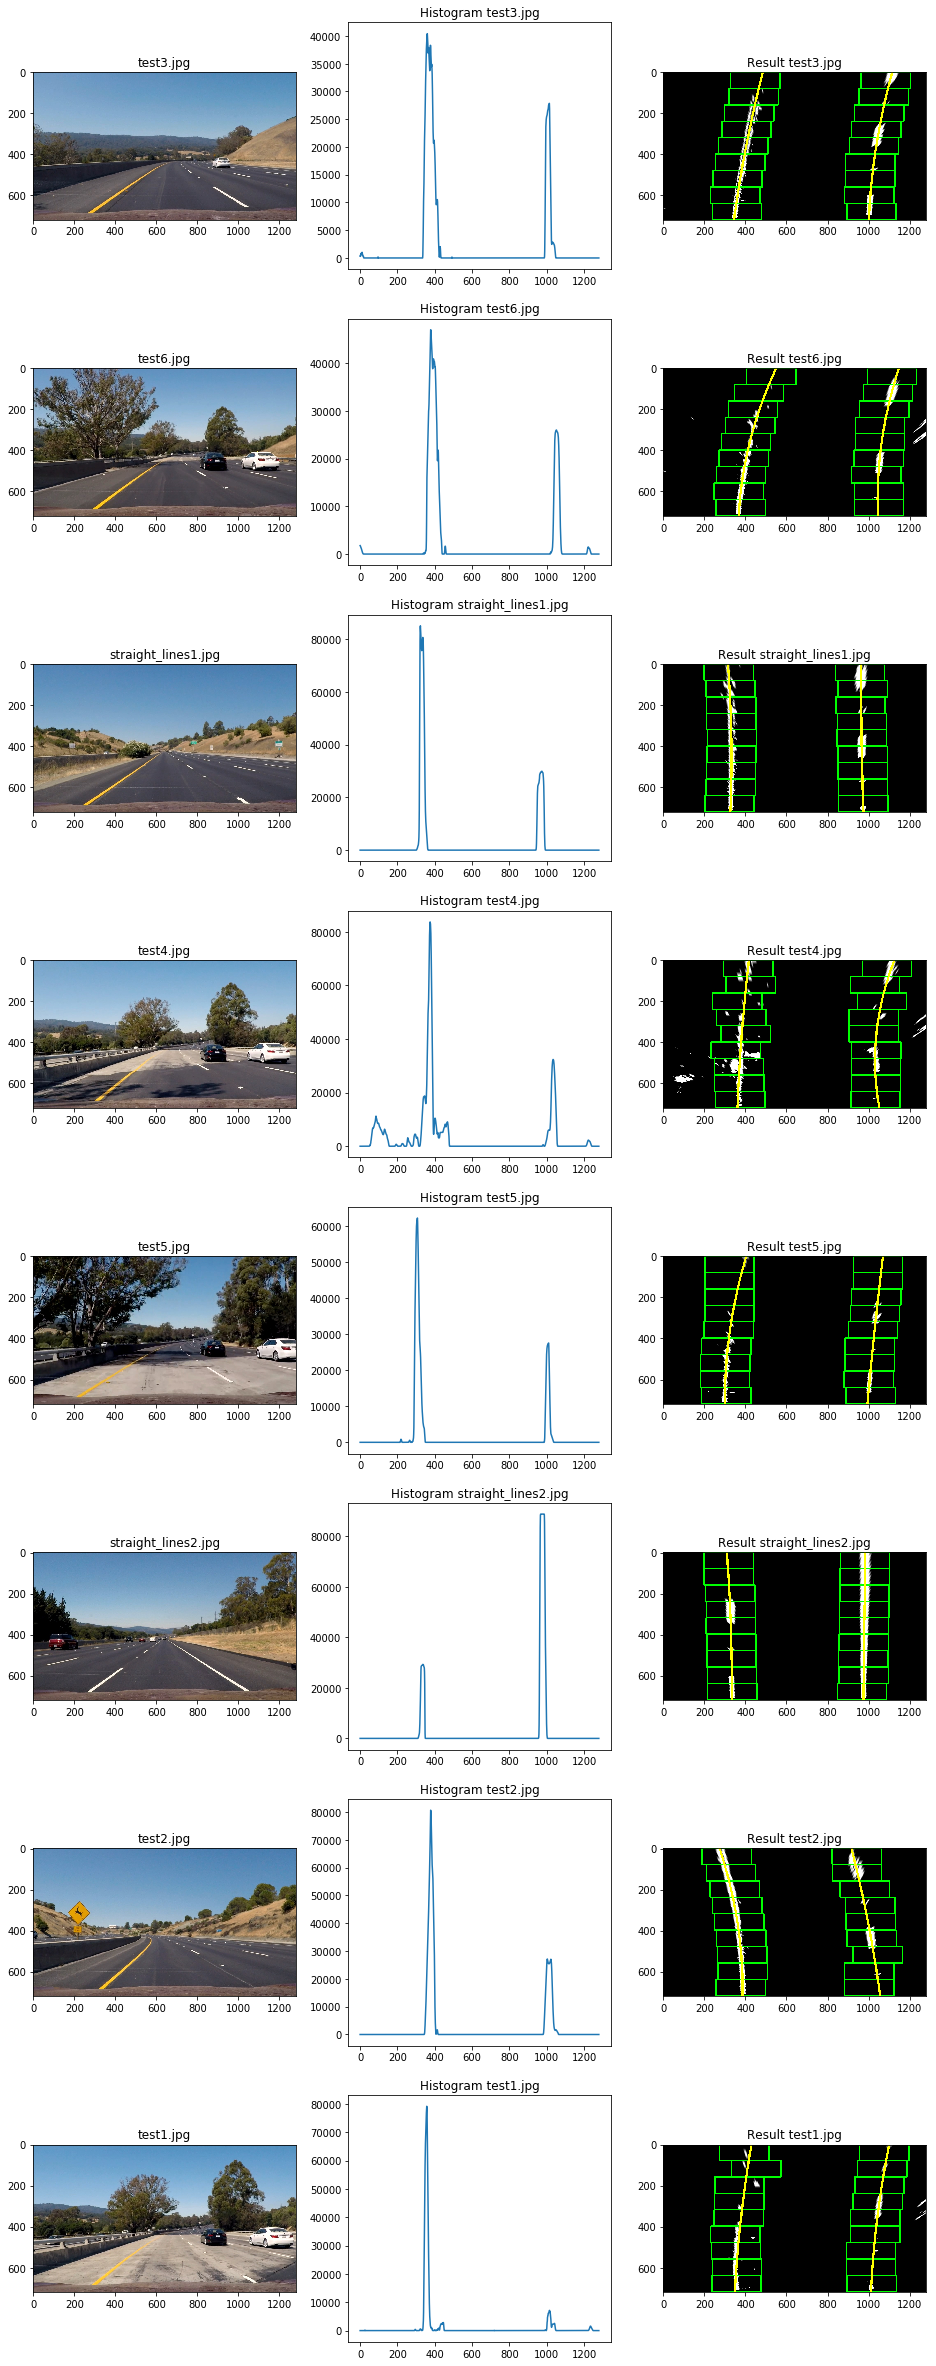

In [10]:
inputDir = 'test_images'
imageList = os.listdir(inputDir)
index = 0
pltColCount = 3
loopPerRow = 1
fig = plt.figure(figsize=(16, 16 * len(imageList) / loopPerRow / pltColCount))
for fileName in imageList:
    image = mpimg.imread(os.path.join(inputDir, fileName))
    
    undistorted = cv2.undistort(image, mtx, dist, None, mtx)
    [colorBinary, binary] = detectRoad(undistorted)
    
    birdViewImage = createBirdView(binary)
    histogram = np.sum(birdViewImage[birdViewImage.shape[0]//2:, :, 0], axis=0)
    
    laneLines = LaneLines()
    laneLines.processNewImage(birdViewImage)
    leftX = laneLines.updateLeftX
    rightX = laneLines.updateRightX
    leftCurveSI = laneLines.updateLeftCurveSI
    rightCurveSI = laneLines.updateRightCurveSI
    laneOffset = laneLines.updateLaneOffset
    y = laneLines.sampleY
    debugImage = laneLines.debugImage
    
    print(fileName)
    print('\tLeft Curvature: {:.0f} m'.format(leftCurveSI))
    print('\tRight Curvature: {:.0f} m'.format(rightCurveSI))
    print('\tThe vehicle is {:.3f} m left of the center.'.format(laneOffset))
    
    mpimg.imsave(os.path.join(outputDir, "birdViewBinary_" + fileName), birdViewImage, format='jpg')
    
    temp = 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(image)
    plt.title('{}'.format(fileName))
    temp = temp + 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.plot(histogram)
    plt.title('Histogram {}'.format(fileName))
    temp = temp + 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    if leftX != None:
        cv2.polylines(debugImage, np.vstack((leftX, y)).T.astype(int).reshape((-1, 1, 2)), True, (255,255,0), 10)
    if rightX != None:
        cv2.polylines(debugImage, np.vstack((rightX, y)).T.astype(int).reshape((-1, 1, 2)), True, (255,255,0), 10)
    plt.imshow(debugImage)
    mpimg.imsave(os.path.join(outputDir, "LineFit_" + fileName), debugImage, format='jpg')
    plt.title('Result {}'.format(fileName))
    index = index + 1

### Lane area Projection back to the undistorted image.

From the section of Computing perspective transformation to create bird view, we compute the perspective transformation using the following source and destination points.

| Source              | Destination   | 
|:-------------------:|:-------------:| 
| 579.55780029, 460   | 320, 0        | 
| 700.44219971, 460   | 320, 720      |
| 195.11116028, 720   | 960, 720      |
| 1084.88879395, 720  | 960, 0        |

When we transfrom the Lane area back to the undistorted image, we can use the perspective transformation using the following source and destination points.

| Source        | Destination         | 
|:-------------:|:-------------------:| 
| 320, 0        | 579.55780029, 460   | 
| 320, 720      | 700.44219971, 460   |
| 960, 720      | 195.11116028, 720   |
| 960, 0        | 1084.67077637, 720  |

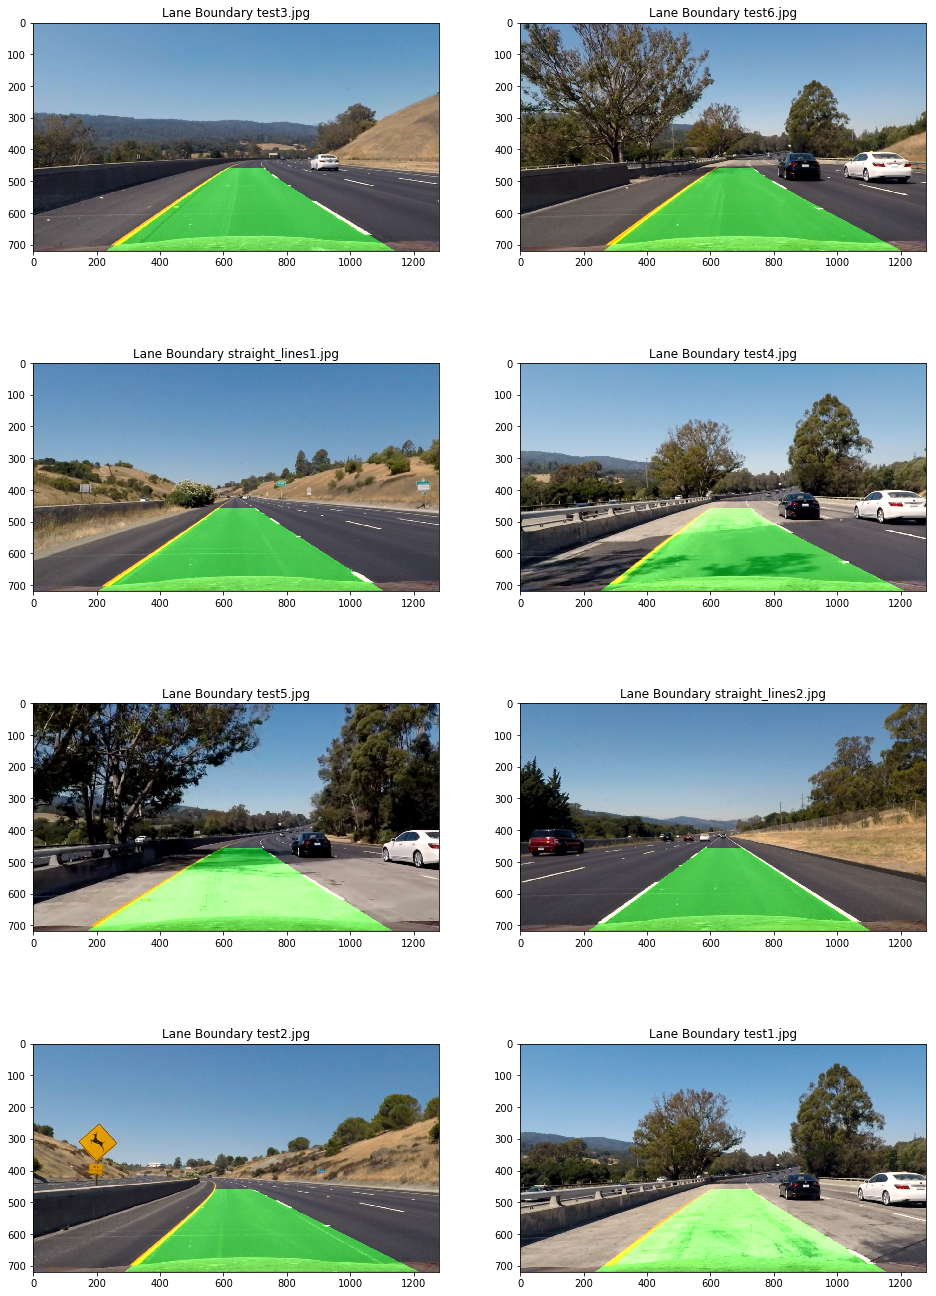

In [11]:
inputDir = 'test_images'
imageList = os.listdir(inputDir)
index = 0
pltColCount = 2
loopPerRow = 2
fig = plt.figure(figsize=(16, 12 * len(imageList) / loopPerRow / pltColCount))
for fileName in imageList:
    image = mpimg.imread(os.path.join(inputDir, fileName))
    
    undistorted = cv2.undistort(image, mtx, dist, None, mtx)
    [colorBinary, binary] = detectRoad(undistorted)
    
    birdViewImage = createBirdView(binary)
    laneLines = LaneLines()
    laneLines.processNewImage(birdViewImage)
    leftX = laneLines.updateLeftX
    rightX = laneLines.updateRightX
    y = laneLines.sampleY
    debugImage = laneLines.debugImage
    laneAreaPts = laneLines.updateLaneAreaPts
    
    laneBirdViewImage = np.zeros_like(birdViewImage)
    if len(laneAreaPts) > 0:
        cv2.fillPoly(laneBirdViewImage, [np.int32(laneAreaPts)], [0, 255, 0])
    laneImage = convertBirdViewBack(laneBirdViewImage)
    undistortedWithLane = cv2.addWeighted(undistorted, 1.0, laneImage, 0.5, 0.0)
    
    mpimg.imsave(os.path.join(outputDir, "LaneBoundary_" + fileName), undistortedWithLane, format='jpg')
    
    temp = 1
    fig.add_subplot(len(imageList) // loopPerRow, pltColCount, index * pltColCount // loopPerRow + temp)
    plt.imshow(undistortedWithLane)
    plt.title('Lane Boundary {}'.format(fileName))
    index = index + 1

### Testing of Identify lane-line pixels and fit their positions with a 2nd order polynomial for video

Helper functions to handle video. The function call is the same as image. The class `LaneLines` would handle both images and videos.

In [12]:
# Video with Lane Area
def processImage(image):
    global laneLines
    
    undistorted = cv2.undistort(image, mtx, dist, None, mtx)
    [colorBinary, binary] = detectRoad(undistorted)
    
    birdViewImage = createBirdView(binary)
    laneLines.processNewImage(birdViewImage)
    leftX = laneLines.updateLeftX
    rightX = laneLines.updateRightX
    leftFit = laneLines.updateLeftFit
    rightFit = laneLines.updateRightFit
    leftFitSI = laneLines.updateLeftFitSI
    rightFitSI = laneLines.updateRightFitSI
    leftCurveSI = laneLines.updateLeftCurveSI
    rightCurveSI = laneLines.updateRightCurveSI
    y = laneLines.sampleY
    debugImage = laneLines.debugImage
    laneAreaPts = laneLines.updateLaneAreaPts
    laneOffset = laneLines.updateLaneOffset
    
    laneBirdViewImage = np.zeros_like(birdViewImage)
    if len(laneAreaPts) > 0:
        cv2.fillPoly(laneBirdViewImage, [np.int32(laneAreaPts)], [0, 255, 0])
    debugImage = cv2.addWeighted(debugImage, 1.0, laneBirdViewImage, 0.5, 0.0)
    laneImage = convertBirdViewBack(laneBirdViewImage)
    undistortedWithLane = cv2.addWeighted(undistorted, 1.0, laneImage, 0.5, 0.0)
    
    leftCurvatureText = ''
    rightCurvatureText = ''
    
    if len(leftFitSI) == 3:
        leftCurvatureText = 'Left Curvature: {:.0f} m'.format(leftCurveSI)
    if len(rightFitSI) == 3:
        rightCurvatureText = 'Right Curvature: {:.0f} m'.format(rightCurveSI)


    centerLineText = ''
    if leftFit != None and rightFit != None:
        centerLineText = 'The vehicle is {:.3f} m left of the center.'.format(laneOffset)
        
    vertices = np.array([[
        (0, 0),
        (1280, 0), 
        (1280, 160), 
        (0, 160)]], dtype=np.int32)
    
    cv2.fillPoly(undistortedWithLane, vertices, (255, 255, 255))
    cv2.putText(undistortedWithLane, leftCurvatureText, (10, 40), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(undistortedWithLane, rightCurvatureText, (10, 80), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(undistortedWithLane, centerLineText, (10, 120), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        
    return undistortedWithLane

# Debug Video
def processImageForDebug(image):
    global laneLines
    
    undistorted = cv2.undistort(image, mtx, dist, None, mtx)
    [colorBinary, binary] = detectRoad(undistorted)
    
    birdViewImage = createBirdView(binary)
    laneLines.processNewImage(birdViewImage)
    leftX = laneLines.updateLeftX
    rightX = laneLines.updateRightX
    leftFit = laneLines.updateLeftFit
    rightFit = laneLines.updateRightFit
    leftFitSI = laneLines.updateLeftFitSI
    rightFitSI = laneLines.updateRightFitSI
    leftCurveSI = laneLines.updateLeftCurveSI
    rightCurveSI = laneLines.updateRightCurveSI
    y = laneLines.sampleY
    debugImage = laneLines.debugImage
    laneAreaPts = laneLines.updateLaneAreaPts
    laneOffset = laneLines.updateLaneOffset
    
    laneBirdViewImage = np.zeros_like(birdViewImage)
    if len(laneAreaPts) > 0:
        cv2.fillPoly(laneBirdViewImage, [np.int32(laneAreaPts)], [0, 255, 0])
    debugImage = cv2.addWeighted(debugImage, 1.0, laneBirdViewImage, 0.5, 0.0)
    laneImage = convertBirdViewBack(laneBirdViewImage)
    undistortedWithLane = cv2.addWeighted(undistorted, 1.0, laneImage, 0.5, 0.0)
    
    leftCurvatureText = ''
    rightCurvatureText = ''
    
    if len(leftFitSI) == 3:
        leftCurvatureText = 'Left Curvature: {:.0f} m'.format(leftCurveSI)
    if len(rightFitSI) == 3:
        rightCurvatureText = 'Right Curvature: {:.0f} m'.format(rightCurveSI)


    centerLineText = ''
    if leftFit != None and rightFit != None:
        centerLineText = 'The vehicle is {:.3f} m left of the center.'.format(laneOffset)
        
    vertices = np.array([[
        (0, 0),
        (1280, 0), 
        (1280, 160), 
        (0, 160)]], dtype=np.int32)
    
    cv2.fillPoly(undistortedWithLane, vertices, (255, 255, 255))
    cv2.putText(undistortedWithLane, leftCurvatureText, (10, 40), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(undistortedWithLane, rightCurvatureText, (10, 80), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
    cv2.putText(undistortedWithLane, centerLineText, (10, 120), 
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

    birdViewColorBinaryImage = createBirdView(colorBinary)
    
    imageTopLeft = cv2.resize(colorBinary,(640, 360))
    imageTopRight = cv2.resize(birdViewColorBinaryImage,(640, 360))
    imageBottomLeft = cv2.resize(debugImage,(640, 360))
    imageBottomRight = cv2.resize(undistortedWithLane,(640, 360))
    
    imageTop = np.hstack((imageTopLeft,imageTopRight))
    imageBottom = np.hstack((imageBottomLeft,imageBottomRight))
        
    return np.vstack((imageTop, imageBottom))

## Video for debug

### Project Video

In [13]:
laneLines = LaneLines()

projectVideoOutputDebug = 'output_video/project_video_debug.mp4'
projectVideoClipDebug = VideoFileClip("project_video.mp4")
projectVideoClipWithLaneDebug = projectVideoClipDebug.fl_image(processImageForDebug)
%time projectVideoClipWithLaneDebug.write_videofile(projectVideoOutputDebug, audio=False)

[MoviePy] >>>> Building video output_video/project_video_debug.mp4
[MoviePy] Writing video output_video/project_video_debug.mp4


100%|█████████▉| 1260/1261 [04:48<00:00,  3.95it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video/project_video_debug.mp4 

CPU times: user 5min 33s, sys: 4.54 s, total: 5min 37s
Wall time: 4min 48s


In [14]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(projectVideoOutputDebug))

### Challenge Video

In [15]:
laneLines = LaneLines()

challengeVideoOutputDebug = 'output_video/challenge_video_debug.mp4'
challengeVideoClipDebug = VideoFileClip("challenge_video.mp4")
challengeVideoClipWithLaneDebug = challengeVideoClipDebug.fl_image(processImageForDebug)
%time challengeVideoClipWithLaneDebug.write_videofile(challengeVideoOutputDebug, audio=False)

[MoviePy] >>>> Building video output_video/challenge_video_debug.mp4
[MoviePy] Writing video output_video/challenge_video_debug.mp4


100%|██████████| 485/485 [01:06<00:00,  7.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video/challenge_video_debug.mp4 

CPU times: user 1min 22s, sys: 1.85 s, total: 1min 24s
Wall time: 1min 6s


In [16]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challengeVideoOutputDebug))

### Harder Challenge Video

In [17]:
laneLines = LaneLines()

harderChallengeVideoOutputDebug = 'output_video/harder_challenge_video_debug.mp4'
harderChallengeVideoClipDebug = VideoFileClip("harder_challenge_video.mp4")
harderChallengeVideoClipWithLaneDebug = harderChallengeVideoClipDebug.fl_image(processImageForDebug)
%time harderChallengeVideoClipWithLaneDebug.write_videofile(harderChallengeVideoOutputDebug, audio=False)

[MoviePy] >>>> Building video output_video/harder_challenge_video_debug.mp4
[MoviePy] Writing video output_video/harder_challenge_video_debug.mp4


100%|█████████▉| 1199/1200 [06:59<00:00,  4.86it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video/harder_challenge_video_debug.mp4 

CPU times: user 8min 6s, sys: 3min 27s, total: 11min 34s
Wall time: 7min


In [18]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(harderChallengeVideoOutputDebug))

## Lane Area Video

### Project Video

In [19]:
laneLines = LaneLines()

projectVideoOutput = 'output_video/project_video.mp4'
projectVideoClip = VideoFileClip("project_video.mp4")
projectVideoClipWithLane = projectVideoClipDebug.fl_image(processImage)
%time projectVideoClipWithLane.write_videofile(projectVideoOutput, audio=False)

[MoviePy] >>>> Building video output_video/project_video.mp4
[MoviePy] Writing video output_video/project_video.mp4


100%|█████████▉| 1260/1261 [04:41<00:00,  4.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video/project_video.mp4 

CPU times: user 5min 17s, sys: 4.66 s, total: 5min 22s
Wall time: 4min 42s


In [20]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(projectVideoOutputDebug))

### Challenge Video

In [21]:
laneLines = LaneLines()

challengeVideoOutput = 'output_video/challenge_video.mp4'
challengeVideoClip = VideoFileClip("challenge_video.mp4")
challengeVideoClipWithLane = challengeVideoClipDebug.fl_image(processImage)
%time challengeVideoClipWithLane.write_videofile(challengeVideoOutput, audio=False)

[MoviePy] >>>> Building video output_video/challenge_video.mp4
[MoviePy] Writing video output_video/challenge_video.mp4


100%|██████████| 485/485 [00:58<00:00,  8.38it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video/challenge_video.mp4 

CPU times: user 1min 13s, sys: 2.01 s, total: 1min 15s
Wall time: 59.4 s


In [22]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(challengeVideoOutput))

### Harder Challenge Video

In [23]:
laneLines = LaneLines()

harderChallengeVideoOutput = 'output_video/harder_challenge_video.mp4'
harderChallengeVideoClip = VideoFileClip("harder_challenge_video.mp4")
harderChallengeVideoClipWithLane = harderChallengeVideoClip.fl_image(processImage)
%time harderChallengeVideoClipWithLane.write_videofile(harderChallengeVideoOutput, audio=False)

[MoviePy] >>>> Building video output_video/harder_challenge_video.mp4
[MoviePy] Writing video output_video/harder_challenge_video.mp4


100%|█████████▉| 1199/1200 [07:19<00:00,  4.69it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_video/harder_challenge_video.mp4 

CPU times: user 8min 11s, sys: 3min 24s, total: 11min 35s
Wall time: 7min 20s


In [24]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(harderChallengeVideoOutput))